In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#!cp "/content/drive/My Drive/Natural computing/stijn/ACS.py" . # from https://github.com/Akavall/AntColonyOptimization/blob/master/ant_colony.py

#/content/drive/My Drive/Natural computing/stijn/ACS.py

In [2]:
!pip install tsplib95

In [3]:
import tsplib95
import networkx
import numpy as np

import time
import matplotlib.pyplot as plt

from numpy import savetxt
from numpy import loadtxt

In [4]:
  TSP_PATH  = "/content/drive/My Drive/tsp/"



In [5]:
def load_tsp(tsp_name): 
  problem = tsplib95.load(TSP_PATH+ tsp_name + ".tsp")
  # convert into a networkx.Graph
  graph = problem.get_graph()
  # convert into a numpy distance matrix
  distance_matrix = np.asarray(networkx.to_numpy_matrix(graph))
  # Change diagonal to np.inf, this is needed in order to use ant_colony.py
  np.fill_diagonal(distance_matrix,  np.inf)
  return distance_matrix

def show_history(history, timestamps):
  '''
  history (numpy.array): Array with history of shortest path length found
  '''
  plt.figure()
  plt.plot(timestamps, history)
  plt.xlabel("time elapsed")
  plt.ylabel("Distance")

In [29]:
#load tsp problem
tsp = load_tsp("ulysses16")

Done in 60.02s
shorted_path: [1, 8, 4, 2, 3, 16, 10, 9, 11, 5, 15, 6, 7, 12, 13, 14]
Length path: 6859.0
Done in 60.00s
shorted_path: [1, 8, 4, 2, 3, 16, 10, 9, 11, 5, 15, 6, 7, 12, 13, 14]
Length path: 6859.0
Done in 60.01s
shorted_path: [1, 8, 4, 2, 3, 16, 10, 9, 11, 5, 15, 6, 7, 12, 13, 14]
Length path: 6859.0
Done in 60.02s
shorted_path: [1, 8, 4, 2, 3, 16, 10, 9, 11, 5, 15, 6, 7, 12, 13, 14]
Length path: 6859.0
Done in 60.01s
shorted_path: [1, 8, 4, 2, 3, 16, 10, 9, 11, 5, 15, 6, 7, 12, 13, 14]
Length path: 6859.0
Done in 60.03s
shorted_path: [1, 8, 4, 2, 3, 16, 10, 9, 11, 5, 15, 6, 7, 12, 13, 14]
Length path: 6859.0
Done in 60.02s
shorted_path: [1, 8, 4, 2, 3, 16, 10, 9, 11, 5, 15, 6, 7, 12, 13, 14]
Length path: 6859.0
Done in 60.03s
shorted_path: [1, 8, 4, 2, 3, 16, 10, 9, 11, 5, 15, 6, 7, 12, 13, 14]
Length path: 6859.0
Done in 60.03s
shorted_path: [1, 8, 4, 2, 3, 16, 10, 9, 11, 5, 15, 6, 7, 12, 13, 14]
Length path: 6859.0
Done in 60.01s
shorted_path: [1, 8, 4, 2, 3, 16, 10, 9,

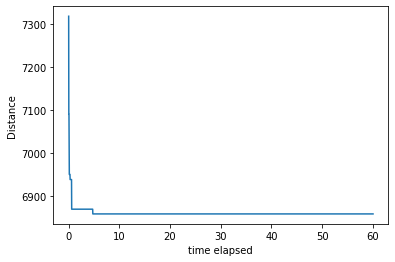

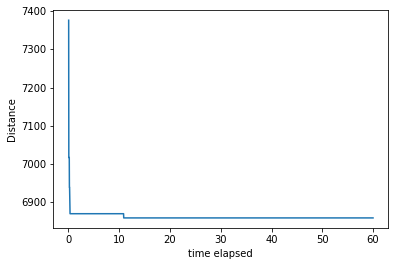

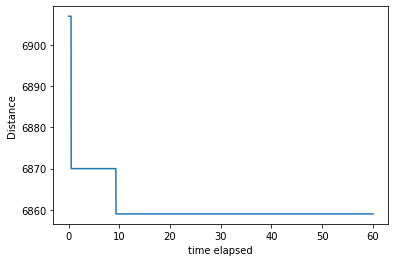

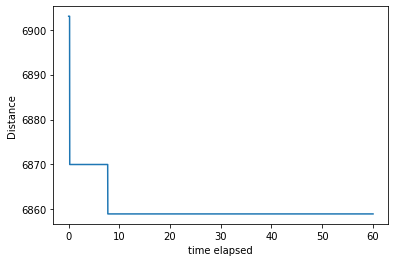

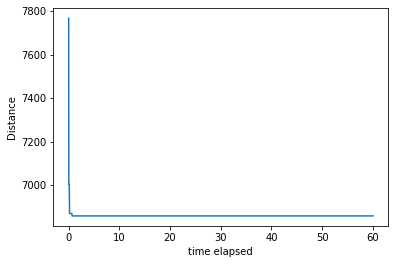

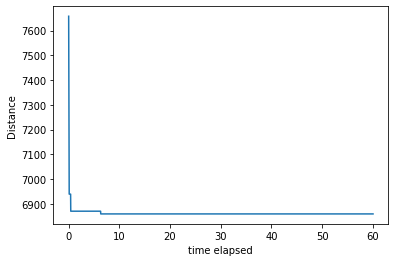

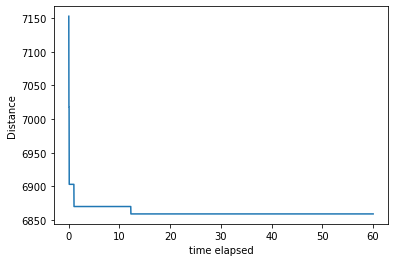

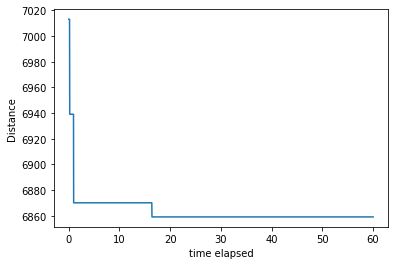

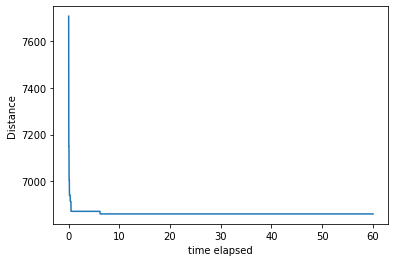

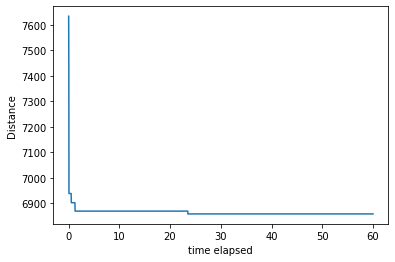

In [30]:

all_history = []
all_timestamps = [] 


## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
## !!! put opt on False for no 2 opt !!!!!


for i in range(10):
  ant_colony = AntColony2(tsp, n_ants=16, n_cities = 16, q0 = 0.5, n_iterations=100, opt = True, timelimit = 60 )

  time_start = time.time()
  shortest_path3, length = ant_colony.run()
  time_end = time.time()

  all_history.append(ant_colony.history)
  all_timestamps.append(ant_colony.timestamps)

  print("Done in %.2fs" % (time_end - time_start,))
  shortest_path = [edge[0]+1 for edge in shortest_path3]
  print ("shorted_path: {}".format(shortest_path))
  print("Length path: {}".format(length))
  show_history(ant_colony.history, ant_colony.timestamps)



pad = len(max(all_history, key=len))

to_save_history =  np.array([i + [0]*(pad-len(i)) for i in all_history])
to_save_timestamps = np.array([i + [0]*(pad-len(i)) for i in all_timestamps])

print(to_save_history.shape)

savetxt('ulysses16ASopt_history.csv', to_save_history, delimiter=',')
savetxt('ulysses16ASopt_timestamps.csv', to_save_timestamps, delimiter=',')


In [ ]:
pad = len(max(all_history, key=len))

In [ ]:
to_save_history =  np.array([i + [0]*(pad-len(i)) for i in all_history])
to_save_timestamps = np.array([i + [0]*(pad-len(i)) for i in all_timestamps])

In [ ]:
to_save_history.shape

(10, 795)

In [ ]:
savetxt('eilAS_history.csv', to_save_history, delimiter=',')
savetxt('eilAS_timestamps.csv', to_save_timestamps, delimiter=',')

In [19]:
import random as rn
import numpy as np
from numpy.random import choice as np_choice

class AntColony2(object):

    def __init__(self, distances, n_ants, n_cities, q0,  n_iterations, timelimit, decay=0.5, alpha=1, beta=5, Q=100, n_best=None, opt=False):
        """
        Args:
            distances (2D numpy.array): Square matrix of distances. Diagonal is assumed to be np.inf.
            n_ants (int): Number of ants running per iteration
            n_best (int): Number of best ants who deposit pheromone
            n_iteration (int): Number of iterations
            decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
            alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
            beta (int or float): exponent on distance, higher beta give distance more weight. Default=1
        """
 
      
        self.timelimit = timelimit
        self.opt = opt
        self.distances  = distances
        self.q0 = q0
        self.n_cities = n_cities
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.Q = Q

        # keeps track of length shortest path
        self.history = []  #np.zeros(n_iterations)
        self.timestamps = []
        
    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        while time.time() - time_start < self.timelimit:
            all_paths = self.gen_all_paths()




            #2-opt 
            if(self.opt == True):
              
              for k in range(len(all_paths)):
             
                all_paths[k] = self.two_opt3(all_paths[k])
          

            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path     
            self.pheromone * self.decay    
            self.spread_pheronome(all_paths, shortest_path=shortest_path)
            # keep track of length shortest path

            self.timestamps.append(time.time() - time_start)
            self.history.append(all_time_shortest_path[1])  #[i] = all_time_shortest_path[1]
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, shortest_path):
        if self.n_best is None:
            for path, dist in all_paths:
                for move in path:
                    self.pheromone[move] += self.Q/dist 
        else:
            # if n_best has a value, only spread pheromones on the n_best tours
            sorted_paths = sorted(all_paths, key=lambda x: x[1])
            for path, dist in sorted_paths[:self.n_best]:
                for move in path:
                    self.pheromone[move] += self.Q/dist 

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set() # tabu list
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start)) # going back to where we started    
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0 # tabu list
        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)
        norm_row = row / row.sum() 
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move


    def two_opt3(self,path):
          improved =True
          # (0,1) (1,2) (2,1) -> 0,1,2

          route = self.path_to_array(path[0])
          best_path = path[0]
          best_dist = path[1]
          while improved:
            for i in range(1,len(route)-1):
              for k in range(i+1, len(route)):
                # perform two opt swap
                new_route = route[:i] + route[i:k][::-1] + route[k:]

                new_path = self.array_to_path(new_route)
                new_dist = self.gen_path_dist(new_path)
                if new_dist < best_dist:
                  route=new_route
                  best_path = new_path
                  best_dist=new_dist
                  break; 
                else:
                  improved=False 
          return (best_path, best_dist)


    def path_to_array(self, path):
      path_arr = [edge[0] for edge in path]
      return path_arr


    def array_to_path(self, path_arr):
        path = []
        for i in range(len(path_arr) - 1):
            path.append((path_arr[i], path_arr[i + 1]))
        path.append((path_arr[-1], path_arr[0]))
        return path




